In [1]:
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec , Phrases

import numpy as np
from multiprocessing import cpu_count

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
nltk.download('punkt')

import pandas as pd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def getFV(document, model1, sizeModel): #promedio del vector caracteristico
    
    words=document.split()
    s=np.zeros(sizeModel)
    k=1
    for w in words:
        if w in model1.wv.vocab:
            s=s+model1[w]
            k=k+1
    
    return s/k

In [3]:
model = gensim.models.Word2Vec.load('w2v300_5.model')

In [4]:
model.wv.vocab

{'presentadora': <gensim.models.keyedvectors.Vocab at 0x2007f0e8470>,
 'exjurado': <gensim.models.keyedvectors.Vocab at 0x2007f0e8320>,
 'artista': <gensim.models.keyedvectors.Vocab at 0x2007f0e8518>,
 'año': <gensim.models.keyedvectors.Vocab at 0x2007f0e8588>,
 'fiorella': <gensim.models.keyedvectors.Vocab at 0x2007f0e8550>,
 'rodríguez': <gensim.models.keyedvectors.Vocab at 0x2007f0e84e0>,
 '45': <gensim.models.keyedvectors.Vocab at 0x2007f0e8240>,
 'presentó': <gensim.models.keyedvectors.Vocab at 0x2007f0e8278>,
 'dueño': <gensim.models.keyedvectors.Vocab at 0x2007f0e82b0>,
 'corazón': <gensim.models.keyedvectors.Vocab at 0x2007f0e8208>,
 'fotografías': <gensim.models.keyedvectors.Vocab at 0x2007f0e8160>,
 'instagram': <gensim.models.keyedvectors.Vocab at 0x2007f0e8128>,
 'fanáticos': <gensim.models.keyedvectors.Vocab at 0x2007f0e85f8>,
 'tardaron': <gensim.models.keyedvectors.Vocab at 0x2007f0e8630>,
 'llenarle': <gensim.models.keyedvectors.Vocab at 0x2007f0e86a0>,
 'publicación': 

In [5]:
df_noticias_train = pd.read_csv('complete_clean_news.csv')
df_noticias_train.drop(df_noticias_train.columns[0],axis=1,inplace=True)
df_noticias_train.head()

,Categoria,Autor,Titulo,Resumen,Contenido
0,farándula,redacción perú21,fiorella rodríguez presentó dueño corazón mese...,conductora sorprendió fanáticos fotos amor red...,presentadora exjurado artista año fiorella rod...
1,perú,redacción perú21,sujeto arrojó thinner padre 68 años prendió fu...,joven negó incendiado padre víctima graves que...,wandherlay enriquez luque 25 detenido arrojado...
2,política,redacción perú21,luis bedoya reyes llama abogados juristas inte...,político 100 años pronunció importancia postul...,luis bedoya reyes fundadores históricos partid...
3,lima,redacción perú21,separan responsables difundir fotos expresiden...,involucrados hospital casimiro ulloa suspendid...,doctor juan luis herrera director general oper...
4,lima,redacción perú21,reaccionó john galliquio cuestionado denuncia ...,exjugador selección peruana reapareció mostró ...,john galliquio exjugador selección peruana apa...


In [6]:
df_2 = df_noticias_train.dropna()

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

df_2['Vector'] = df_2['Contenido'].apply(lambda x: getFV(x,model,300)) 

E:\INSTALACIONES\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
E:\INSTALACIONES\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
df_2.head()

,Categoria,Autor,Titulo,Resumen,Contenido,Vector
0,farándula,redacción perú21,fiorella rodríguez presentó dueño corazón mese...,conductora sorprendió fanáticos fotos amor red...,presentadora exjurado artista año fiorella rod...,"[0.004521261801710352, -0.35131151823734397, 0..."
1,perú,redacción perú21,sujeto arrojó thinner padre 68 años prendió fu...,joven negó incendiado padre víctima graves que...,wandherlay enriquez luque 25 detenido arrojado...,"[0.26227770111567916, 0.2556349137864475, -0.0..."
2,política,redacción perú21,luis bedoya reyes llama abogados juristas inte...,político 100 años pronunció importancia postul...,luis bedoya reyes fundadores históricos partid...,"[0.18556199327439946, -0.24287225660484504, -0..."
3,lima,redacción perú21,separan responsables difundir fotos expresiden...,involucrados hospital casimiro ulloa suspendid...,doctor juan luis herrera director general oper...,"[-0.2011724293903064, -0.08155904694770773, -0..."
4,lima,redacción perú21,reaccionó john galliquio cuestionado denuncia ...,exjugador selección peruana reapareció mostró ...,john galliquio exjugador selección peruana apa...,"[0.048363614192271795, -0.1913235466210888, -0..."


In [13]:
data_train = list(df_2['Vector'])

In [28]:
len(data_train)

125890

In [30]:
from sklearn.model_selection import train_test_split

X = list(df_2['Vector'])
X_train, X_test = train_test_split(X, test_size=0.2, random_state=0)
print(len(X), len(X_train), len(X_test))

125890 100712 25178


In [31]:
import model_library as mdl

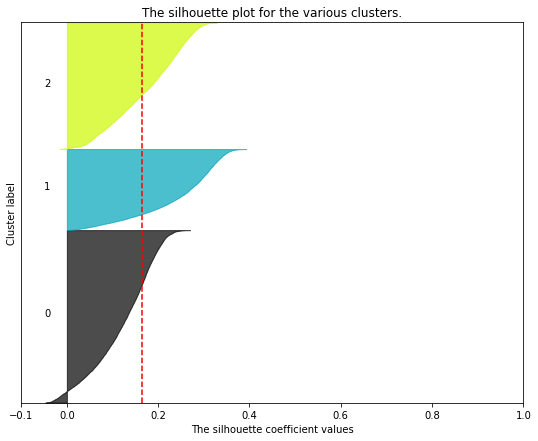

In [32]:
nc = 3
kmeans = KMeans(n_clusters=nc, random_state=0)
kmeans.fit(X_train)
mdl.grafico_silueta(kmeans, X_test, nc)

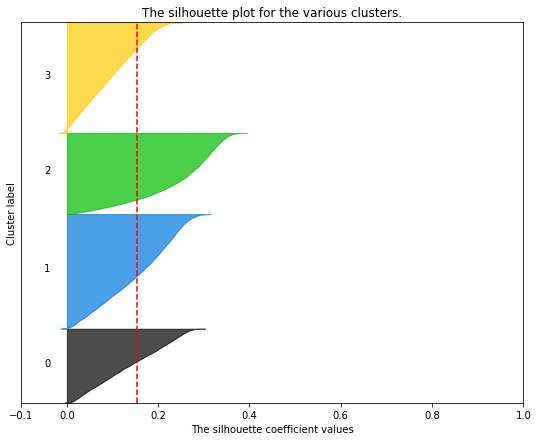

In [35]:
nc = 4
kmeans2 = KMeans(n_clusters=nc, random_state=0)
kmeans2.fit(X_train)
mdl.grafico_silueta(kmeans2, X_test, nc)

In [37]:
!pip install joblib

In [39]:
from joblib import dump, load
dump(kmeans, 'km1_c4_300-5.joblib') 

['km1_c4_300-5.joblib']

In [ ]:
clf = load('km1_c4_300-5.joblib') 
mdl.grafico_silueta(clf, X_test, nc)

In [ ]:
nc = 5
kmeans3 = KMeans(n_clusters=nc, random_state=0)
kmeans3.fit(X_train)
mdl.grafico_silueta(kmeans3, X_test, nc)